<h2 id="t1" style="margin-bottom: 18px">Imbalanced datasets</h2>

This case study tries to handle highly unbalanced datasets, with a focus on resampling. 

In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('creditcard.csv')

df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class 0: 284315
Class 1: 492
Proportion: 577.88 : 1


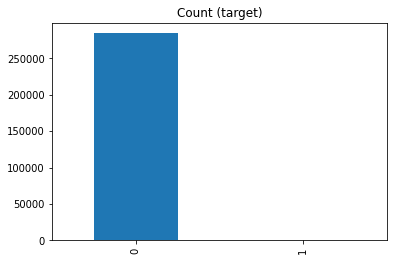

In [3]:
target_count = df_train.Class.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


labels = df_train.columns

X = df_train[labels]
y = df_train['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:15:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 100.00%


In [6]:
model = XGBClassifier()
model.fit(X_train[['V1']], y_train)
y_pred = model.predict(X_test[['V1']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 99.84%


Confusion matrix:
 [[56870     5]
 [   87     0]]


<ipython-input-7-8aeae4f6eca9>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-7-8aeae4f6eca9>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


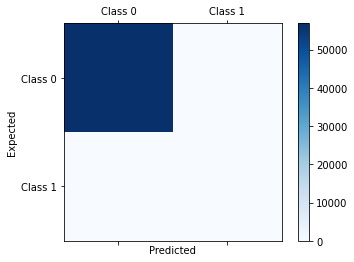

In [7]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

In [9]:
# Class count
count_class_0, count_class_1 = df_train.Class.value_counts()

# Divide by class
df_class_0 = df_train[df_train['Class'] == 0]
df_class_1 = df_train[df_train['Class'] == 1]

<h2 id="t5">Random under-sampling</h2>

Random under-sampling:
0    492
1    492
Name: Class, dtype: int64


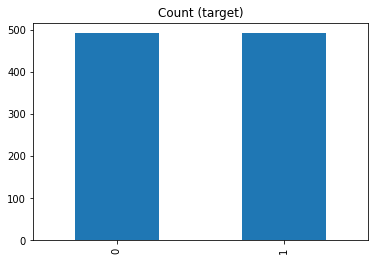

In [12]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Class.value_counts())

df_test_under.Class.value_counts().plot(kind='bar', title='Count (target)');

<h2 id="t6">Random over-sampling</h2>

Random over-sampling:
0    284315
1    284315
Name: Class, dtype: int64


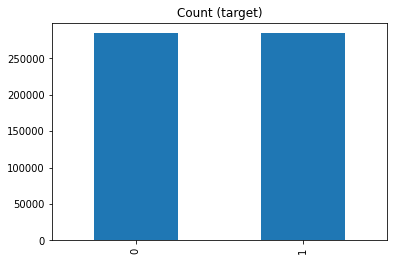

In [13]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Class.value_counts())

df_test_over.Class.value_counts().plot(kind='bar', title='Count (target)');

In [14]:
import imblearn

In [18]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [28]:
pca_df=pd.concat([pd.DataFrame(X),y], axis=1)
pca_df.head(2)

,0,1,Class
0,94813.862881,55.979467,0
1,94813.854640,-90.953660,0


<AxesSubplot:xlabel='0', ylabel='1'>

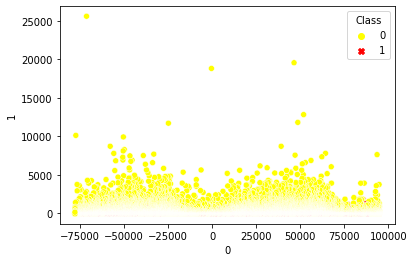

In [42]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
X = pca.fit_transform(df_train.iloc[:,:-1])
y = df_train.iloc[:,-1]
pca_df=pd.concat([pd.DataFrame(X),y], axis=1)
# plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

sns.scatterplot(x=0, y=1, hue="Class", style='Class', data = pca_df, palette=['yellow','red'])

<h2 id="#t72">Random under-sampling and over-sampling with imbalanced-learn</h2>

<AxesSubplot:xlabel='0', ylabel='1'>

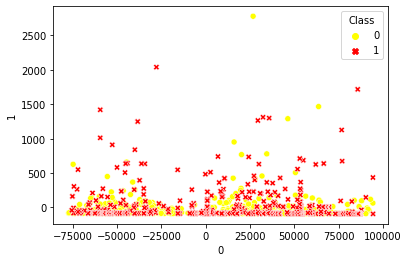

In [45]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)
rus_df=pd.concat([pd.DataFrame(X_rus),pd.DataFrame(y_rus)], axis=1)
sns.scatterplot(x=0, y=1, hue="Class", style='Class', data = rus_df, palette=['yellow','red'])

<AxesSubplot:xlabel='0', ylabel='1'>

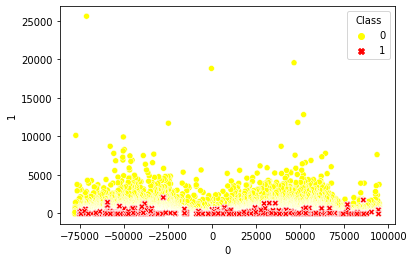

In [47]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

ros_df=pd.concat([pd.DataFrame(X_ros),pd.DataFrame(y_ros)], axis=1)
sns.scatterplot(x=0, y=1, hue="Class", style='Class', data = ros_df, palette=['yellow','red'])

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2)

In the code below, we'll use <code>ratio='majority'</code> to resample the majority class.

<AxesSubplot:xlabel='0', ylabel='1'>

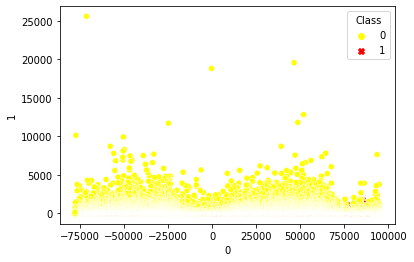

In [50]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl= tl.fit_resample(X, y)

tl_df=pd.concat([pd.DataFrame(X_tl),pd.DataFrame(y_tl)], axis=1)
sns.scatterplot(x=0, y=1, hue="Class", style='Class', data = tl_df, palette=['yellow','red'])

In [52]:
tl_df.shape

(284542, 3)

clustering methods

<AxesSubplot:xlabel='0', ylabel='1'>

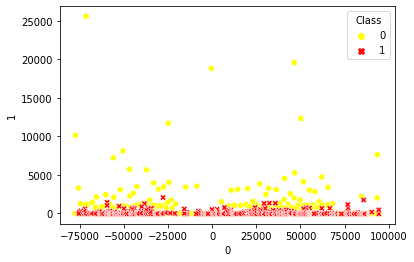

In [53]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X, y)
cc_df=pd.concat([pd.DataFrame(X_cc),pd.DataFrame(y_cc)], axis=1)
sns.scatterplot(x=0, y=1, hue="Class", style='Class', data = cc_df, palette=['yellow','red'])

SMOTE (Synthetic Minority Oversampling TEchnique)

 ![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

We'll use <code>ratio='minority'</code> to resample the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
sm_df=pd.concat([pd.DataFrame(X_sm),pd.DataFrame(y_sm)], axis=1)
sns.scatterplot(x=0, y=1, hue="Class", style='Class', data = sm_df, palette=['yellow','red'])

<h2 id="t11" style="margin-bottom: 18px">Over-sampling followed by under-sampling</h2>

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

<AxesSubplot:xlabel='0', ylabel='1'>

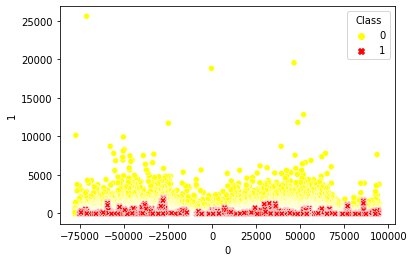

In [54]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt, y_smt = smt.fit_resample(X, y)
smt_df=pd.concat([pd.DataFrame(X_smt),pd.DataFrame(y_smt)], axis=1)
sns.scatterplot(x=0, y=1, hue="Class", style='Class', data = smt_df, palette=['yellow','red'])

In [55]:
smt_df['Class'].value_counts()

0    273209
1    273209
Name: Class, dtype: int64

0    142157
1    142157
Name: Class, dtype: int64


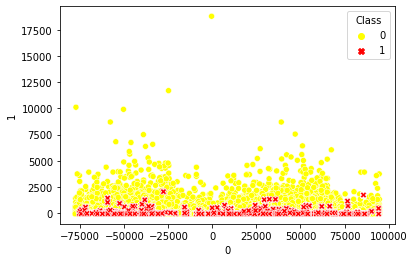

In [57]:
from imblearn.combine import SMOTETomek

ross = RandomOverSampler(sampling_strategy=0.5)
russ = RandomUnderSampler()
X_rous, y_rous = ross.fit_resample(X, y)
X_rous, y_rous = russ.fit_resample(X_rous, y_rous)
rous_df=pd.concat([pd.DataFrame(X_rous),pd.DataFrame(y_rous)], axis=1)
sns.scatterplot(x=0, y=1, hue="Class", style='Class', data = rous_df, palette=['yellow','red'])
print(rous_df['Class'].value_counts())